# 8.8 循环神经网络

## RNN实现股价预测

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week9/zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [3]:
# 归一化处理哦
price_norm = price/max(price)
price_norm

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64

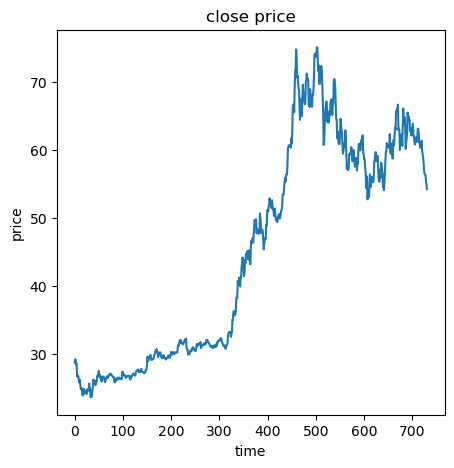

In [4]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [17]:
#define X and y
#define method to extract X and y
def extract_data(data,time_step):
    X = []
    y = []
    #0,1,2,3...9:10个样本；time_step=8;0,1...7;1,2...8;2,3...9三组（两组样本）
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    #print(X.shape)
    X = X.reshape(X.shape[0],X.shape[1],1)
    #print(X.shape)
    return X, y

In [18]:
time_step = 8

In [19]:
X,y = extract_data(price_norm,time_step)

In [20]:
X.shape,y

((723, 8, 1),
 [0.3558396590757757,
  0.3453189505926222,
  0.3435876947662805,
  0.34944732987082167,
  0.33639632441070716,
  0.33133573045678516,
  0.3322679451325076,
  0.33280063923292047,
  0.3190837661472899,
  0.31895059262218667,
  0.32001598082301236,
  0.3317352510320948,
  0.3230789719003862,
  0.3289386070049274,
  0.3245438806765215,
  0.325476095352244,
  0.3248102277267279,
  0.3217472366493541,
  0.33093620988147554,
  0.32987082168064985,
  0.32813956585430815,
  0.3282727393794113,
  0.34225595951524834,
  0.33599680383539754,
  0.3347982421094686,
  0.31548808096950326,
  0.31735251032094813,
  0.3161539485950193,
  0.3194832867225995,
  0.3317352510320948,
  0.334398721534159,
  0.3499800239712345,
  0.34332134771607403,
  0.34665068584365427,
  0.34771607404447996,
  0.3391929684378745,
  0.3431881741909708,
  0.34412038886669327,
  0.3474497269942735,
  0.3577040884272206,
  0.3559728326008789,
  0.35757091490211745,
  0.36702623518444527,
  0.357304567851911,
  

In [21]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [25]:
# train the model
y = np.array(y)
model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 11/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 12/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 13/200
25/25 [=================

In [26]:
y_train_predict = model.predict(X) * max(price)
y_train = y * max(price)

23/23 [==============================] - 0s 907us/step


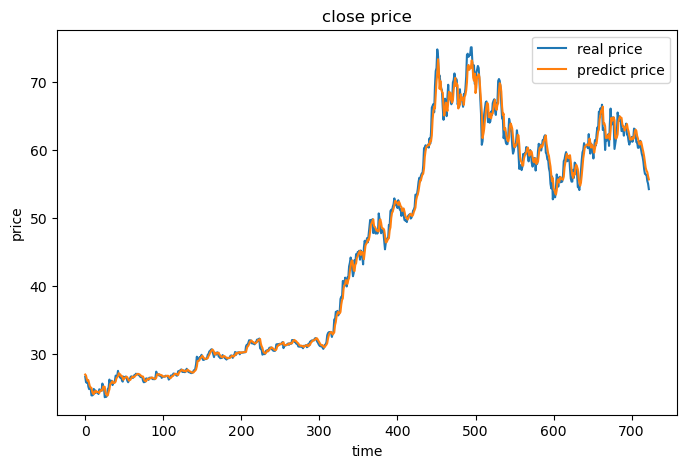

In [27]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [29]:
data_test = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week9/zgpa_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()

0    53.33
1    53.83
2    54.74
3    54.45
4    53.95
Name: close, dtype: float64

In [30]:
price_test_norm = price_test/max(price)
X_test_norm, y_test_norm = extract_data(price_test_norm,time_step)

In [31]:
#make prediction based on the test data
y_test_predict = model.predict(X_test_norm)*max(price)
y_test = [i*max(price) for i in y_test_norm]

6/6 [==============================] - 0s 1ms/step


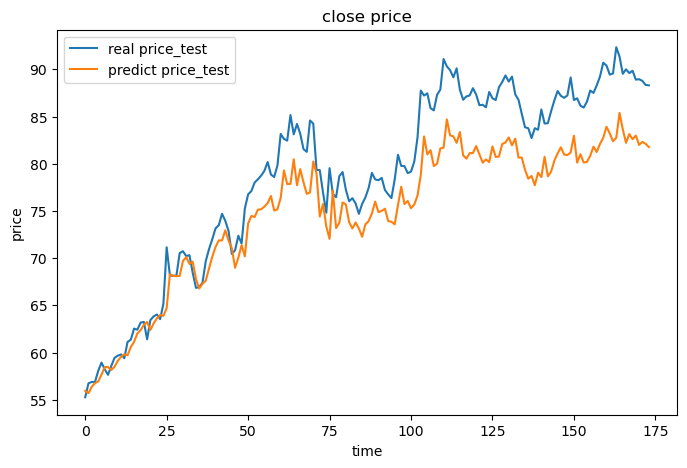

In [32]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [40]:
result_y_test = np.array(y_test).reshape(-1,1)
print(result_y_test.shape)
result_y_test_predict = np.array(y_test_predict)
print(result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result,columns=['real_price_test','predict_price_test'])
result.to_csv('zgpa_predict_test.csv')

(174, 1)
(174, 1)
(174, 2)
